In [2]:
from dfLoader import *
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics.pairwise as pw
import time

In [8]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(spec, origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    fig.set_size_inches(3, 10)
    plt.show(block=False)

    
    
def getDataLoader(batchSize,ifAug,ifTrain):

    noiseList = []
    dfList = []

    if ifTrain:
        audioDic = trainAudioDic
    else:
        audioDic = testAudioDic

    for annName in audioDic:
        annPath = '../annotations/' + annName
        audioPath = '../audio/' + audioDic[annName]
        df = dfLoader(annPath, audioPath, allData = True)
        noises = getNoiseList(df, audioPath, 300)
        noiseList.extend(noises)
        dfList.append(df)

    finalDF = pd.concat(dfList)
    # print(finalDF['class'].unique())
    dataLoader = genDataLoader(batchSize,finalDF,ifAug, noiseList)
    return dataLoader


In [10]:
train_loader = getDataLoader(32,ifAug = False,ifTrain = True)


data size for bat before aug is torch.Size([17376, 128, 32])
data size for bat is torch.Size([17376, 128, 32])
size for label is torch.Size([17376])



In [11]:
for i in train_loader:
    x = i
    break

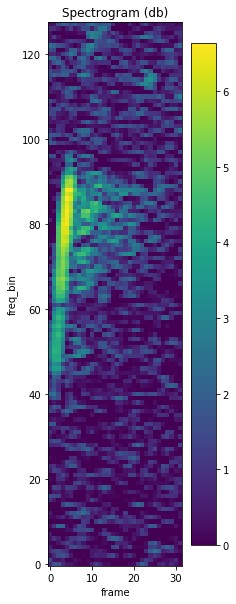

In [19]:
plot_spectrogram(x[0][31])